<a href="https://colab.research.google.com/github/MLiserb/Public_articles/blob/main/List_part2_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

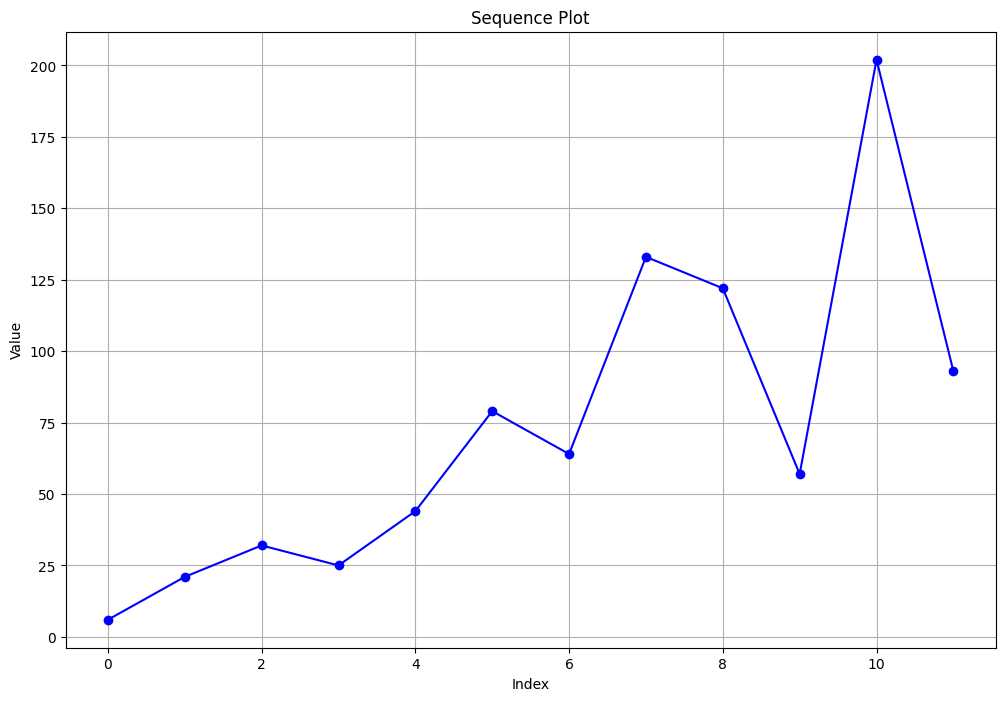

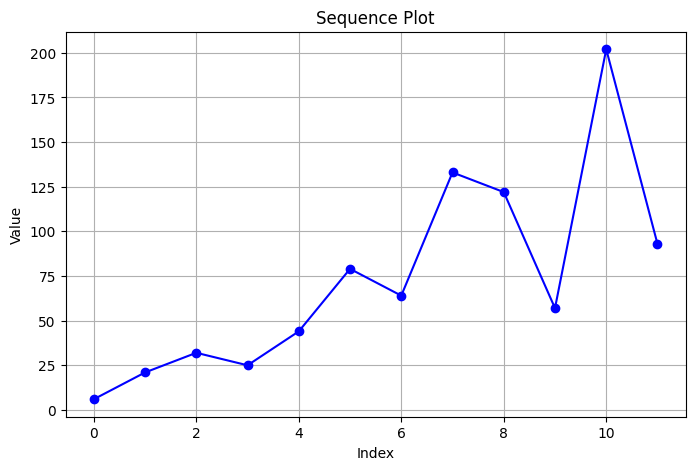

In [ ]:
import matplotlib.pyplot as plt

# Sequence of numbers
sequence = [6, 21, 32, 25, 44, 79, 64, 133, 122, 57, 202, 93]

# Slightly larger plot
plt.figure(figsize=(12, 8))
plt.plot(sequence, marker='o', linestyle='-', color='b')
plt.title('Sequence Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Slightly smaller plot
plt.figure(figsize=(8, 5))
plt.plot(sequence, marker='o', linestyle='-', color='b')
plt.title('Sequence Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

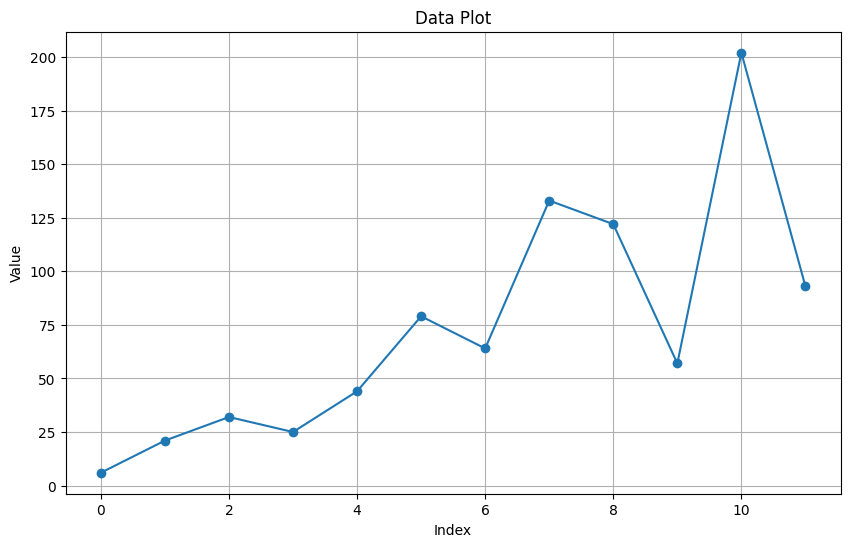

In [ ]:
import matplotlib.pyplot as plt

# Sample data
data = [6, 21, 32, 25, 44, 79, 64, 133, 122, 57, 202, 93]

plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-')
plt.title('Data Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Calculate the Z-scores
mean = np.mean(data)
std_dev = np.std(data)
z_scores = [(x - mean) / std_dev for x in data]

# Set a threshold for identifying outliers
threshold = 3

outliers = [data[i] for i in range(len(data)) if abs(z_scores[i]) > threshold]

print("Outliers identified by Z-score method:", outliers)

Outliers identified by Z-score method: []


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = [x for x in data if x < lower_bound or x > upper_bound]

print("Outliers identified by IQR method:", outliers_iqr)

Outliers identified by IQR method: []


In [ ]:
from sklearn.ensemble import IsolationForest

# Reshape data for Isolation Forest
data_reshaped = np.array(data).reshape(-1, 1)

# Fit the model
iso_forest = IsolationForest(contamination=0.1)
outliers_iso = iso_forest.fit_predict(data_reshaped)

# Extract outliers
outliers_ml = [data[i] for i in range(len(data)) if outliers_iso[i] == -1]

print("Outliers identified by Isolation Forest:", outliers_ml)

Outliers identified by Isolation Forest: [6, 202]


In [ ]:
import numpy as np

# Your data
data = [6, 21, 32, 25, 44, 79, 64, 133, 122, 57, 202, 93]

# Convert data to a NumPy array for easier calculation
data_array = np.array(data)

# Calculate the mean and standard deviation
mean = np.mean(data_array)
std_dev = np.std(data_array)

# Calculate the Z-scores
z_scores = (data_array - mean) / std_dev

# Find the outliers (Z-score > 3 or Z-score < -3)
outliers = data_array[np.abs(z_scores) > 3]

print("Outliers:", outliers)


Outliers: []


In [ ]:
import numpy as np

# Your data
data = [6, 21, 32, 25, 44, 79, 64, 133, 122, 57, 202, 93]

# Convert data to a NumPy array
data_array = np.array(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(data_array, 25)
Q3 = np.percentile(data_array, 75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = data_array[(data_array < lower_bound) | (data_array > upper_bound)]

print("Outliers:", outliers)

Outliers: []


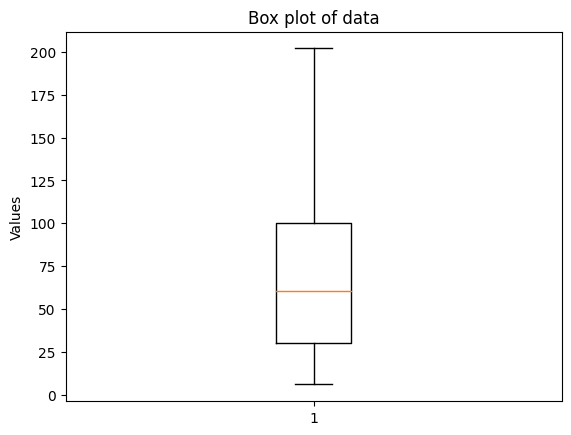

In [ ]:
import matplotlib.pyplot as plt

# Your data
data = [6, 21, 32, 25, 44, 79, 64, 133, 122, 57, 202, 93]

# Plotting the box plot
plt.boxplot(data)
plt.title("Box plot of data")
plt.ylabel("Values")
plt.show()


Forecasted points: [158.61752732 119.39779255 142.83951091 128.8283463  137.20284901]


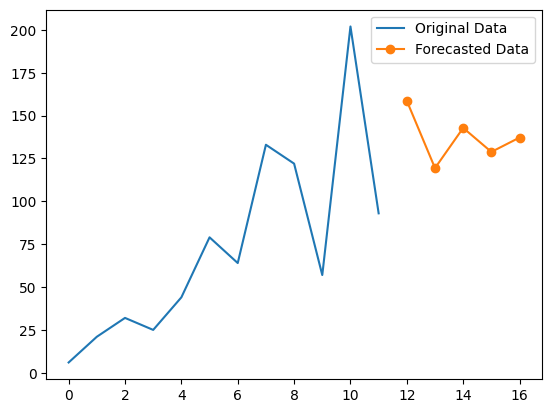

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Your data
data = [6, 21, 32, 25, 44, 79, 64, 133, 122, 57, 202, 93]

# Convert data to a pandas Series
series = pd.Series(data)

# Fit the ARIMA model
model = ARIMA(series, order=(1, 1, 1))  # (p, d, q) order
model_fit = model.fit()

# Forecast the next 5 points
forecast = model_fit.forecast(steps=5)
forecast_points = forecast.values

# Print the forecasted points
print("Forecasted points:", forecast_points)

# Plot the original data and the forecasted points
plt.plot(series, label='Original Data')
plt.plot(range(len(series), len(series) + len(forecast_points)), forecast_points, label='Forecasted Data', marker='o')
plt.legend()
plt.show()

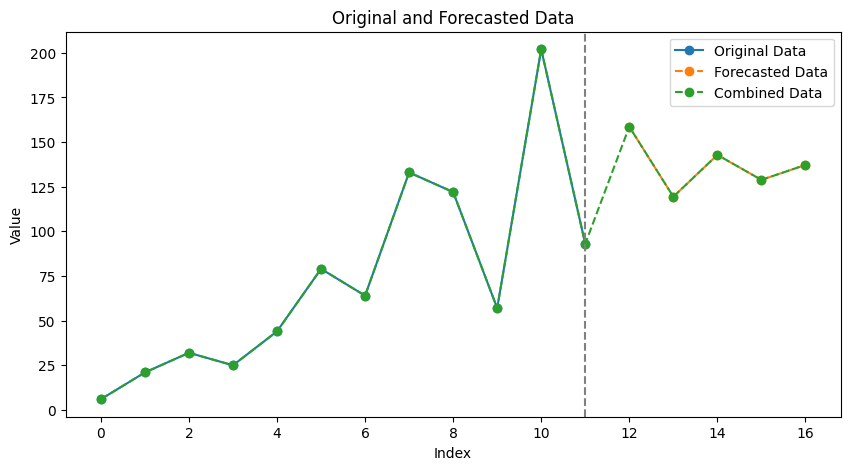

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Your data
data = [6, 21, 32, 25, 44, 79, 64, 133, 122, 57, 202, 93]

# Convert data to a pandas Series
series = pd.Series(data)

# Fit the ARIMA model
model = ARIMA(series, order=(1, 1, 1))  # (p, d, q) order
model_fit = model.fit()

# Forecast the next 5 points
forecast = model_fit.forecast(steps=5)
forecast_points = forecast.values

# Combine original data and forecasted data
combined_data = np.concatenate([data, forecast_points])

# Plot the original data and the forecasted points
plt.figure(figsize=(10, 5))
plt.plot(range(len(series)), series, label='Original Data', marker='o')
plt.plot(range(len(series), len(series) + len(forecast_points)), forecast_points, label='Forecasted Data', marker='o', linestyle='--')
plt.plot(range(len(combined_data)), combined_data, label='Combined Data', marker='o', linestyle='--')
plt.axvline(x=len(series)-1, color='gray', linestyle='--')  # Adding a vertical line to indicate the start of forecasting
plt.legend()
plt.title('Original and Forecasted Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()
